In [1]:
import pandas as pd
import numpy as np

In [85]:
df = pd.read_csv("../Data/header.csv")
df.shape

(12697, 7)

In [3]:
df.head()

,real_word_account_start,has_inline_image,no_return_path,no_reply_no_return,yes_reply_no_return,free_in_domain,Label
0,False,False,False,False,False,False,Ham
1,True,False,False,False,False,False,Ham
2,False,False,False,False,False,False,Ham
3,False,False,False,False,False,False,Ham
4,True,False,False,False,False,False,Ham


In [4]:
df.groupby("Label").mean() * 100

,real_word_account_start,has_inline_image,no_return_path,no_reply_no_return,yes_reply_no_return,free_in_domain
Label,,,,,,
Ham,49.875519,0.000000,0.000000,0.000000,0.000000,0.082988
Spam,35.938563,14.260717,2.303879,1.924759,0.379119,1.866433


In [6]:
df["Label"].value_counts()

Spam    10287
Ham      2410
Name: Label, dtype: int64

In [86]:
df["Label"] = df["Label"].map({"Ham":0,"Spam":1})

In [8]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)

In [11]:
((X_train.shape,y_train.shape),(X_test.shape,y_test.shape))

(((9522, 6), (9522,)), ((3175, 6), (3175,)))

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, accuracy_score

In [13]:
lr = LogisticRegression(C=0.001)

In [14]:
lr.fit(X_train,y_train)

LogisticRegression(C=0.001)

In [15]:
accuracy_score(y_test,lr.predict(X_test))

0.8100787401574803

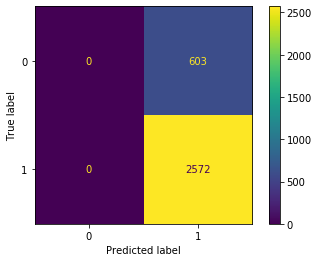

In [16]:
plot_confusion_matrix(lr,X_test,y_test)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
model = KNeighborsClassifier(n_neighbors=5,)

In [45]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [57]:
accuracy_score(y_test,model.predict(X_test))

0.6614173228346457

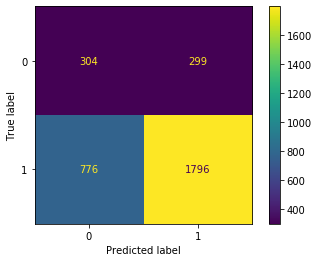

In [58]:
plot_confusion_matrix(model,X_test,y_test)

In [227]:
from sklearn.model_selection import cross_val_score

In [282]:
df = pd.read_csv("../Data/header.csv")
df["Label"] = df["Label"].map({"Ham":0,"Spam":1})
df["Label"].value_counts()
df = df.sample(frac=1)

In [283]:
from random import shuffle
spam_indexes = list(df[df["Label"] == 1].index)
print(len(spam_indexes))
shuffle(spam_indexes)
to_delete = spam_indexes[:8000]
print(len(to_delete))
print(to_delete[:5])

10287
8000
[8030, 12474, 7592, 3054, 3645]


In [284]:
df = df.drop(index=to_delete,)

In [285]:
df.shape

(4697, 7)

In [286]:
df["Label"].value_counts()

0    2410
1    2287
Name: Label, dtype: int64

In [287]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)

0.5897394240137765

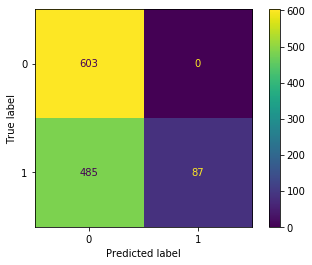

In [305]:
lr = LogisticRegression(C=0.001,penalty="l2")
lr.fit(X_train,y_train)
plot_confusion_matrix(lr,X_test,y_test)
cross_val_score(lr,X,y,).mean()

In [309]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr.predict(X_test),target_names=["Ham","Spam"]))

              precision    recall  f1-score   support

         Ham       0.55      1.00      0.71       603
        Spam       1.00      0.15      0.26       572

    accuracy                           0.59      1175
   macro avg       0.78      0.58      0.49      1175
weighted avg       0.77      0.59      0.49      1175

